In [28]:
import pandas as pd
import numpy as np

In [100]:
with open('C:/Users/leelab/Desktop/HMaze_2023_12_22__10_59_43/HMaze_2023_12_22__10_59_43.eye.txt', 'r') as file:
    
    csv_reader = csv.reader(file)

    # Initialize variables to store the combined rows
    combined_rows = [np.array([]) for x in range(3)]
    current_row = []

    # Iterate through the rows
    for row_num, row in enumerate(csv_reader):
        # Join the rows every n rows
        combined_rows[row_num % 3] =  np.concatenate((combined_rows[row_num % 3], np.array(row,dtype=np.int0)))
        

In [121]:
beh = pd.read_csv('C:/Users/leelab/Desktop/HMaze_2023_12_22__10_59_43/HMaze_2023_12_22__10_59_43.beh.txt', sep=",")

In [122]:
beh

,GoalBlockNum,TotalEpisodeNum,EpisodeNum,Goal,Start,EpisodeLength,TotalTrialNum,TrialNum,TotalCompletedNum,CompletedNum,CurrentState,Distance,Choice,ChosenState,GoalPeriodEntry,ForePeriodEntry,DelayperiodEntry,DelayperiodExit,FeedbackPeriodEntry,GlobalStart
0,0,1,1,5,12,4,0,0,0,0,12,4,-1,12,0,0,-1,0,0,123.350595
1,0,1,1,5,12,4,1,1,1,1,11,4,0,11,0,7435,7968,8702,9535,123.350595
2,0,1,1,5,12,4,2,2,2,2,3,3,0,3,0,10751,11284,13483,14216,123.350595
3,0,1,1,5,12,4,3,3,3,3,4,2,1,4,0,15416,15949,16749,17482,123.350595
4,0,1,1,5,12,4,4,4,4,4,5,1,0,5,0,18682,19215,19881,20681,123.350595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,70,297,1,6,12,4,1499,3,1464,2,12,4,-1,12,7125005,7705631,0,0,0,123.350595
2014,70,297,1,6,12,4,1499,3,1464,2,12,4,-1,12,7125005,7708364,0,0,0,123.350595
2015,70,297,1,6,12,4,1499,3,1464,2,12,4,-1,12,7125005,7711130,0,0,0,123.350595
2016,70,297,1,6,12,4,1499,3,1464,2,12,4,-1,12,7125005,7713879,0,0,0,123.350595


In [117]:
eyeData = pd.DataFrame(np.array(combined_rows).transpose(),columns=['Time','xpos','ypos'])

In [126]:
beh.ForePeriodEntry.values[0] + np.floor(beh.GlobalStart.values[0]*1000)

123350.0

In [132]:
import seaborn as sns

In [134]:
import matplotlib.pyplot as plt

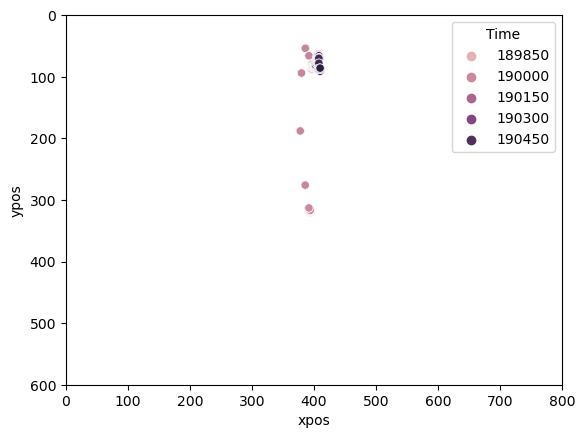

In [157]:
i=16
# eye_fore = eyeData[(eyeData.Time > (beh.ForePeriodEntry.values[i] + np.floor(beh.GlobalStart.values[i]*1000))) & 
#                    (eyeData.Time < (beh.DelayperiodEntry.values[i] + np.floor(beh.GlobalStart.values[i]*1000)))]
eye_fore = eyeData[(eyeData.Time > (beh.DelayperiodExit.values[i] + np.floor(beh.GlobalStart.values[i]*1000))) & 
                   (eyeData.Time < (beh.FeedbackPeriodEntry.values[i] + np.floor(beh.GlobalStart.values[i]*1000)))]
plt.close('all')
sns.scatterplot(data=eye_fore,x='xpos',y='ypos',hue='Time')
plt.xlim(0,800)
plt.ylim(0,600)
plt.gca().invert_yaxis()